In [1]:
import numpy as np 
import pandas as pd 

import kagglehub

path = kagglehub.dataset_download("meeraajayakumar/spotify-user-behavior-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/sonja/.cache/kagglehub/datasets/meeraajayakumar/spotify-user-behavior-dataset/versions/1


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Project: **Analyzing Spotify User Behavior**

Aim: Predict user willingness to subscribe to Spotify Premium using supervised machine learning techniques.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
df=pd.read_excel("/Users/sonja/.cache/kagglehub/datasets/meeraajayakumar/spotify-user-behavior-dataset/versions/1/Spotify_data.xlsx")
df

Age  Gender spotify_usage_period  \
0    20-35  Female    More than 2 years   
1    12-20    Male    More than 2 years   
2    35-60  Others   6 months to 1 year   
3    20-35  Female    1 year to 2 years   
4    20-35  Female    1 year to 2 years   
..     ...     ...                  ...   
515  20-35  Female    More than 2 years   
516  20-35  Female    More than 2 years   
517  20-35  Female    More than 2 years   
518  20-35  Female   6 months to 1 year   
519  20-35  Female    More than 2 years   

                             spotify_listening_device  \
0                  Smart speakers or voice assistants   
1                                  Computer or laptop   
2                  Smart speakers or voice assistants   
3      Smartphone, Smart speakers or voice assistants   
4                                          Smartphone   
..                                                ...   
515  Smartphone, Computer or laptop, Wearable devices   
516                    Smartphone, Computer or laptop   
517                                        Smartphone   
518                                        Smartphone   
519                    Smartphone, Computer or laptop   

       spotify_subscription_plan premium_sub_willingness  \
0            Free (ad-supported)                     Yes   
1            Free (ad-supported)                     Yes   
2            Free (ad-supported)                     Yes   
3            Free (ad-supported)                      No   
4            Free (ad-supported)                      No   
..                           ...                     ...   
515          Free (ad-supported)                     Yes   
516          Free (ad-supported)                     Yes   
517          Free (ad-supported)                      No   
518  Premium (paid subscription)                     Yes   
519  Premium (paid subscription)                     Yes   

             preffered_premium_plan preferred_listening_content  \
0          Family Plan-Rs 179/month                     Podcast   
1    Individual Plan- Rs 119/ month                     Podcast   
2          Student Plan-Rs 59/month                     Podcast   
3                               NaN                       Music   
4                               NaN                       Music   
..                              ...                         ...   
515        Student Plan-Rs 59/month                       Music   
516        Student Plan-Rs 59/month                       Music   
517        Student Plan-Rs 59/month                       Music   
518  Individual Plan- Rs 119/ month                       Music   
519        Student Plan-Rs 59/month                       Music   

    fav_music_genre music_time_slot  \
0            Melody           Night   
1               Rap       Afternoon   
2               Pop           Night   
3            Melody           Night   
4            Melody           Night   
..              ...             ...   
515             Pop         Morning   
516             Pop           Night   
517             Pop           Night   
518          Melody           Night   
519             Pop           Night   

                                music_Influencial_mood  \
0                                Sadness or melancholy   
1                         Social gatherings or parties   
2                         Relaxation and stress relief   
3    Relaxation and stress relief, Social gathering...   
4                         Relaxation and stress relief   
..                                                 ...   
515  Uplifting and motivational, Sadness or melancholy   
516  Relaxation and stress relief, Uplifting and mo...   
517                       Relaxation and stress relief   
518  Relaxation and stress relief, Uplifting and mo...   
519  Relaxation and stress relief, Sadness or melan...   

                                   music_lis_frequency  \
0                                         leisure time 

In [5]:
df1=df.copy()

In [6]:
df.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [7]:
#missing values
df.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

**Exploratory Data Analysis**

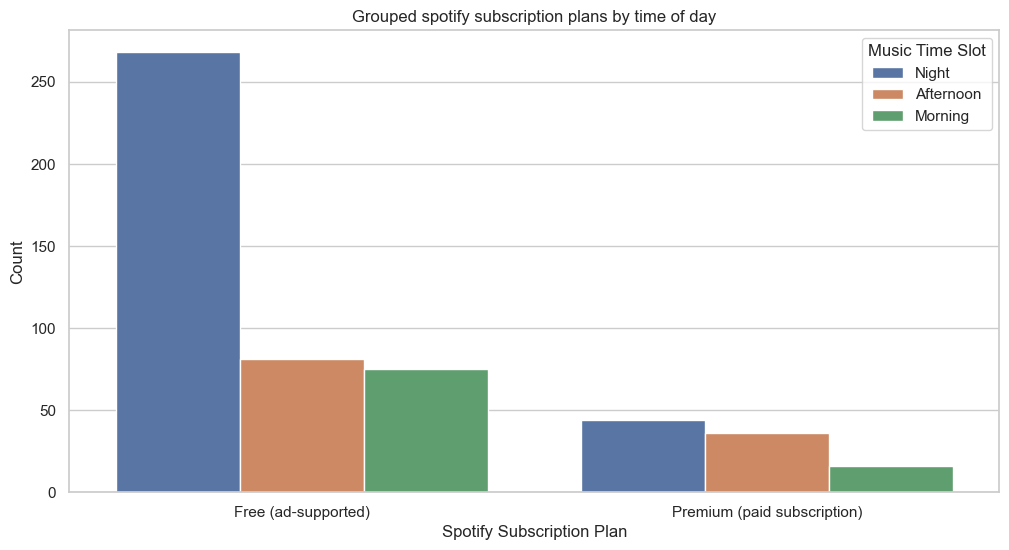

In [9]:
dfgrouped = df.groupby(['spotify_subscription_plan', 'music_time_slot']).size().reset_index(name='count')
dfsorted = dfgrouped.sort_values(by='count', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='spotify_subscription_plan', y='count', hue='music_time_slot', data=dfsorted)
barplot.set_title('Grouped spotify subscription plans by time of day')
barplot.set_xlabel('Spotify Subscription Plan')
barplot.set_ylabel('Count')
barplot.legend(title='Music Time Slot', title_fontsize='12', loc='upper right')

plt.show()

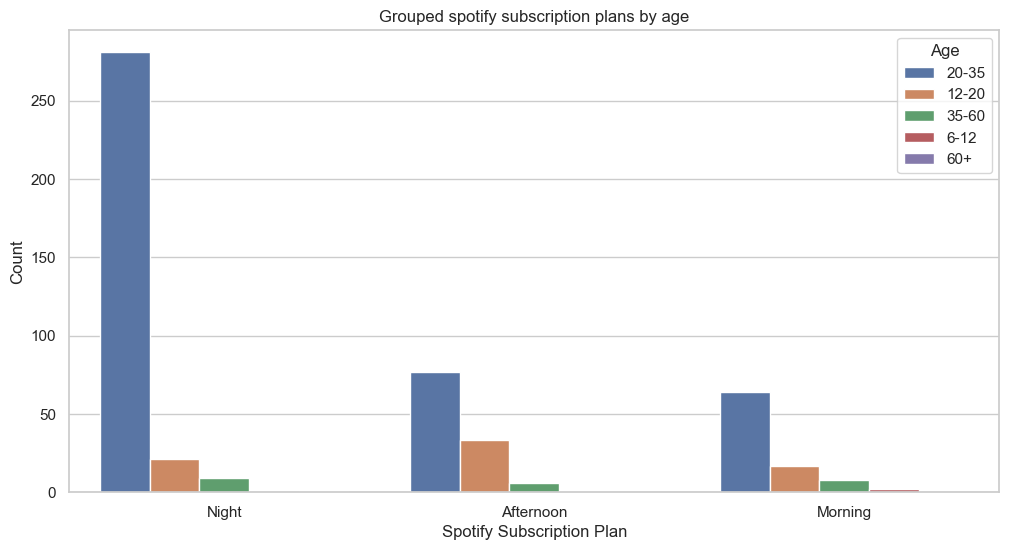

In [10]:
dfgrouped = df.groupby(['music_time_slot','Age']).size().reset_index(name='count')
dfsorted = dfgrouped.sort_values(by='count', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='music_time_slot', y='count', hue='Age', data=dfsorted)
barplot.set_title('Grouped spotify subscription plans by age')
barplot.set_xlabel('Spotify Subscription Plan')
barplot.set_ylabel('Count')
barplot.legend(title='Age', title_fontsize='12', loc='upper right')

plt.show()

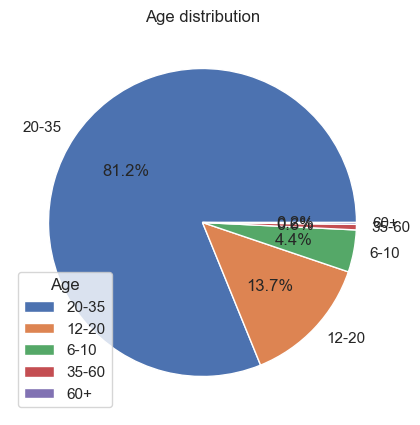

In [11]:
#age group
y=df['Age'].value_counts()
plt.figure(figsize=(5,5))
labels=['20-35','12-20','6-10','35-60','60+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left',title='Age', title_fontsize='12')
plt.title('Age distribution')
plt.show()

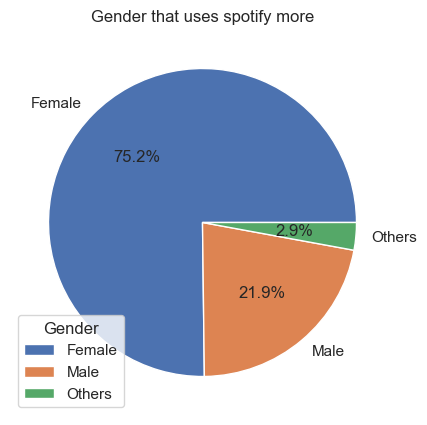

In [12]:
#gender
y=df['Gender'].value_counts()
plt.figure(figsize=(5,5))
labels=['Female','Male','Others']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left',title='Gender', title_fontsize='12')
plt.title('Gender that uses spotify more')
plt.show()

<Axes: xlabel='spotify_subscription_plan', ylabel='count'>

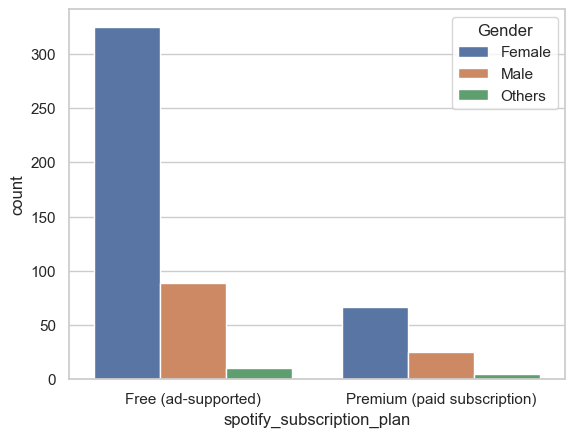

In [13]:
#spotify subscription plan
sns.countplot(x='spotify_subscription_plan',data=df,hue='Gender')

<Axes: xlabel='premium_sub_willingness', ylabel='count'>

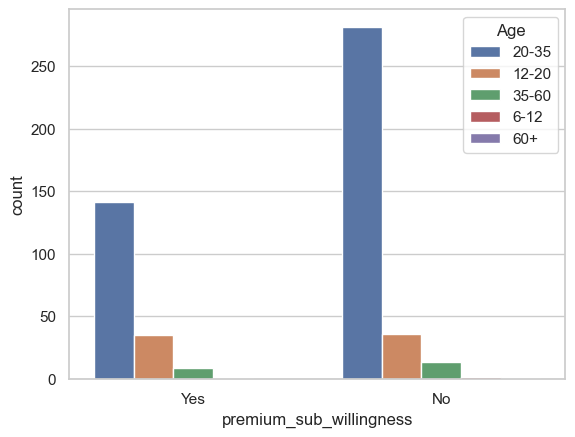

In [14]:
#willingness to take subscription
sns.countplot(x='premium_sub_willingness',data=df,hue='Age')

preffered_premium_plan
Individual Plan- Rs 119/ month    95
Student Plan-Rs 59/month          94
Duo plan- Rs 149/month            84
Family Plan-Rs 179/month          39
Name: count, dtype: int64


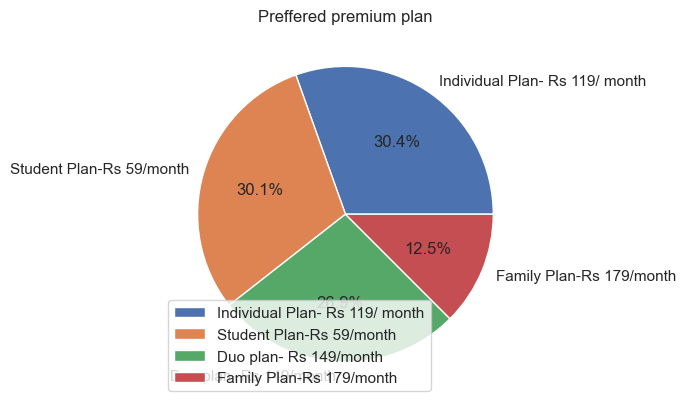

In [15]:
count = df['preffered_premium_plan'].value_counts()
print(count)
labels = ['Individual Plan- Rs 119/ month', 'Student Plan-Rs 59/month', 'Duo plan- Rs 149/month','Family Plan-Rs 179/month']
plt.pie(count,labels=labels, autopct = '%1.1f%%')
plt.legend(loc='lower left')
plt.title('Preffered premium plan')
plt.show()

In [16]:
df['preffered_premium_plan'].value_counts()

preffered_premium_plan
Individual Plan- Rs 119/ month    95
Student Plan-Rs 59/month          94
Duo plan- Rs 149/month            84
Family Plan-Rs 179/month          39
Name: count, dtype: int64

/var/folders/9r/jrfqnhl94_zfjg01kkrts03r0000gn/T/ipykernel_83264/3681409854.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ppp.set_xticklabels(new_labels)


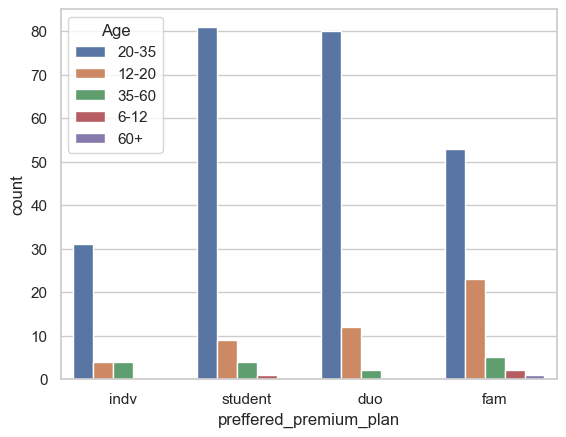

In [17]:
ppp = sns.countplot(x='preffered_premium_plan',data=df,hue='Age')
new_labels = ['indv','student', 'duo', 'fam'] 
ppp.set_xticklabels(new_labels)

# Show plot
plt.show()

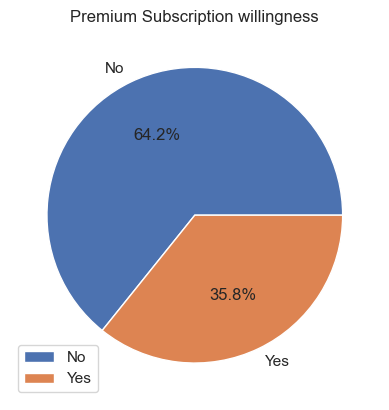

In [18]:
#premium subscription willingness
y3=df['premium_sub_willingness'].value_counts()
labels=['No','Yes']
plt.pie(y3,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Premium Subscription willingness')
plt.show()

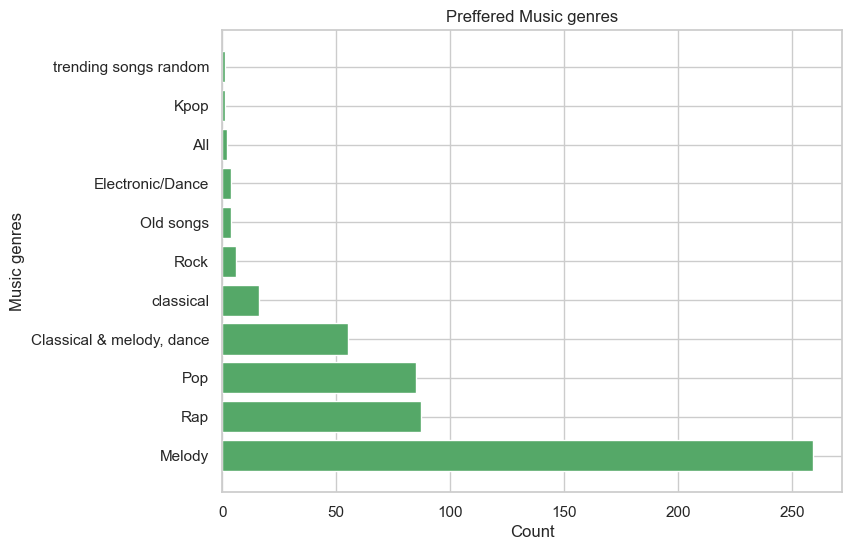

In [19]:
#fav genre
fig,ax=plt.subplots(figsize=(8,6))
y2=df['fav_music_genre'].value_counts().values
x2=df['fav_music_genre'].unique()
plt.barh(x2,y2,color='g')
plt.xlabel('Count')
plt.ylabel('Music genres')
plt.title('Preffered Music genres')
plt.show()

In [20]:
data_one_hot = pd.get_dummies(df, drop_first=True)
excluded_columns = [
    col for col in data_one_hot.columns 
    if 'spotify_subscription_plan' in col or 'preffered_premium_plan' in col
]
filtered = data_one_hot.drop(columns=excluded_columns)
# correlations with target variable premium sub willingness
correlation_matrix_filtered = filtered.corr()
correlation_with_target_filtered = correlation_matrix_filtered['premium_sub_willingness_Yes'].sort_values(ascending=False)

correlation_with_target_filtered.head(15)

premium_sub_willingness_Yes                                    1.000000
preferred_listening_content_Podcast                            0.281493
music_Influencial_mood_Sadness or melancholy                   0.239087
preffered_pod_duration_Longer                                  0.233458
fav_music_genre_Rap                                            0.226041
music_expl_method_Radio                                        0.199077
spotify_listening_device_Smart speakers or voice assistants    0.198396
pod_host_preference_unknown Podcasters                         0.190914
pod_lis_frequency_Once a week                                  0.173696
music_lis_frequency_Study Hours                                0.132660
fav_pod_genre_Health and Fitness                               0.124721
pod_variety_satisfaction_Very Satisfied                        0.122400
pod_variety_satisfaction_Satisfied                             0.121750
music_expl_method_recommendations, Radio, Others               0

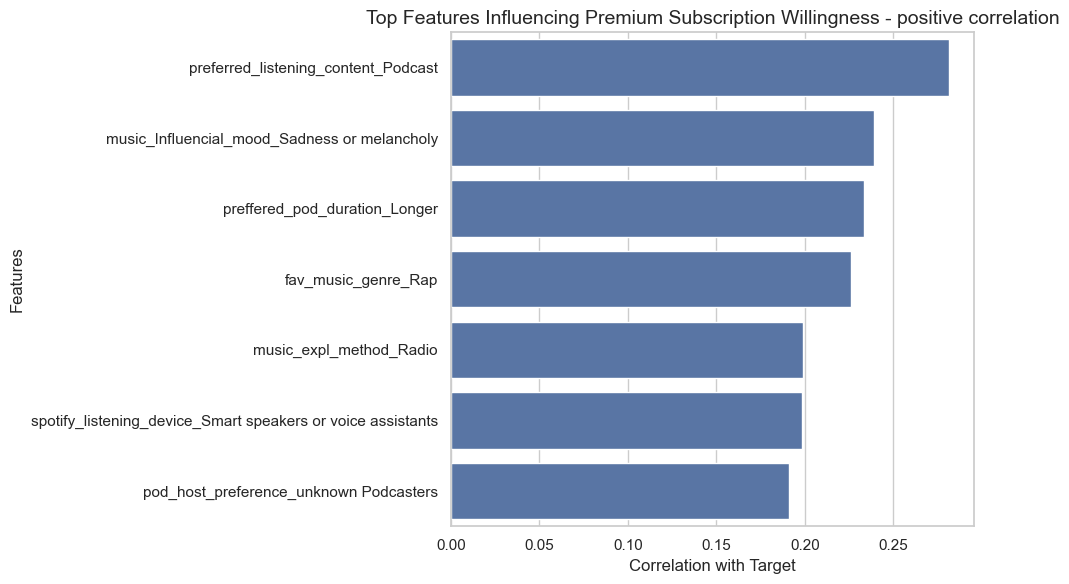

In [21]:
top_features = correlation_with_target_filtered[1:8]  # top 10 positivecorrelation

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, orient='h')
plt.title("Top Features Influencing Premium Subscription Willingness - positive correlation", fontsize=14)
plt.xlabel("Correlation with Target", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


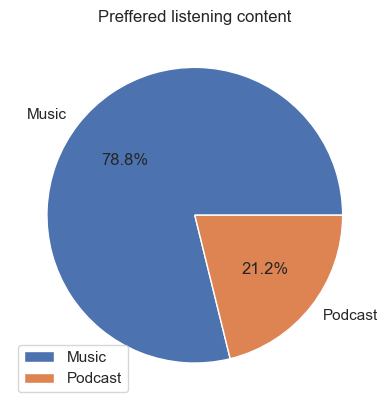

In [22]:
#fav listening content
y3=df['preferred_listening_content'].value_counts()
labels=['Music','Podcast']
plt.pie(y3,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Preffered listening content')
plt.show()

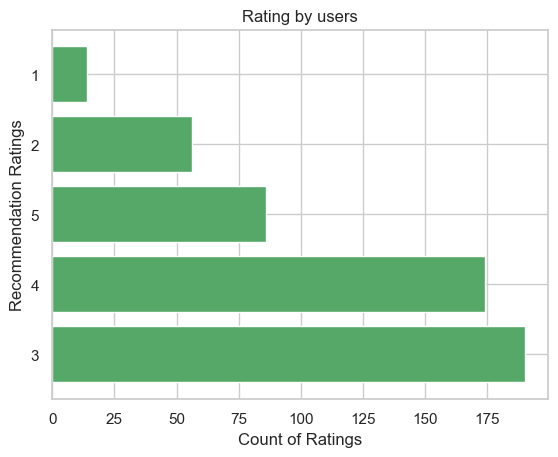

In [23]:
#music recommendation rating
y4=df['music_recc_rating'].value_counts().values
x4=['3','4','5','2','1']
plt.barh(x4,y4,color='g')
plt.xlabel('Count of Ratings')
plt.ylabel('Recommendation Ratings')
plt.title('Rating by users')
plt.show()

**Key Findings from Exploratory Data Analysis**
* Most users listen to music at night, especially those of age 20-35
  
* The Age group that uses spotify more is between 20-35 followed by 12-20.

* A bigger part of the users comprises of Females than males in the dataset.

* Most of the users prefer free ad supported plan than premium plans and premium users are more of females.

* People between the age group 20-35 uses more of premium plans.
  
* Individual and student plans are the most popular plans.

* 35.8 percentage of people are willing to take premium and also willing to continue with the premium subscription plan.

* Most of the people prefer to listen to music than podcast.

* Their favourite music genre is melody.
  
* There isn't much correlation between willingness to buy a subscription plan and other factors (there is weak correlation between podcast listeners and premium sub willingness, or sad music listeners and premium sub willingness - but evidence is not strong enough to indicate any real link between these factors) 

* Out of those who gave ratings, the most common rating is 3.





In [25]:
le=LabelEncoder()
lst=['Age','Gender','spotify_usage_period','spotify_listening_device','spotify_subscription_plan','premium_sub_willingness','preffered_premium_plan','preferred_listening_content','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [26]:
#splitting the dataset for chisquare test
X=df.drop(['premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']     

**Chi Square Test for feature selection**

In [28]:
selector = SelectKBest(score_func=chi2, k=15)

In [29]:
X_new = selector.fit_transform(X,y)

In [30]:
selected_feature_indices = selector.get_support(indices=True)

In [31]:
selected_features = X.columns[selected_feature_indices]

In [32]:
selected_features

Index(['spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'preffered_premium_plan',
       'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
       'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
       'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference',
       'preffered_pod_duration', 'pod_variety_satisfaction'],
      dtype='object')

In [33]:
#splitting the dataset for model building
X1=df.drop(['Age','music_recc_rating','fav_pod_genre','preffered_pod_format','premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']

In [34]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(X1)
Xsc

array([[0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.25      ],
       [0.5       , 1.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [1.        , 0.33333333, 0.28571429, ..., 1.        , 0.        ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.42857143, ..., 0.        , 0.66666667,
        0.25      ],
       [0.        , 0.33333333, 0.42857143, ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 1.        , 0.5       , ..., 1.        , 1.        ,
        0.25      ]])

**Model Building**

In [36]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.2,random_state=2)

In [37]:
X_train.shape

(416, 15)

In [38]:
y_train.shape

(416,)

**K Nearest Neighbors**

In [40]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        66
           1       0.84      0.71      0.77        38

    accuracy                           0.85       104
   macro avg       0.85      0.82      0.83       104
weighted avg       0.85      0.85      0.84       104



**Support Vector Machine**

In [42]:
#SVM
sv=SVC()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        66
           1       0.84      0.68      0.75        38

    accuracy                           0.84       104
   macro avg       0.84      0.80      0.82       104
weighted avg       0.84      0.84      0.83       104



**Naive Bayes Classifier**

In [44]:
#Gaussian NB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        66
           1       0.78      0.76      0.77        38

    accuracy                           0.84       104
   macro avg       0.82      0.82      0.82       104
weighted avg       0.84      0.84      0.84       104



**Decision Tree**

In [46]:
#Decision tree
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        66
           1       0.73      0.63      0.68        38

    accuracy                           0.78       104
   macro avg       0.77      0.75      0.75       104
weighted avg       0.78      0.78      0.78       104



**Decision Tree Hypertuning**

In [48]:
#Dt hypertuning
parameters = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(dt,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [49]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [50]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=2)
dt1.fit(X_train,y_train)
y_predd=dt1.predict(X_test)
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86        66
           1       0.84      0.55      0.67        38

    accuracy                           0.80       104
   macro avg       0.81      0.75      0.76       104
weighted avg       0.80      0.80      0.79       104



**Random Forest**

In [52]:
#random forest
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.85      0.74      0.79        38

    accuracy                           0.86       104
   macro avg       0.85      0.83      0.84       104
weighted avg       0.86      0.86      0.85       104



**Random Forest Hypertuning**

In [54]:
#rf hypertuning
parameters = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(rf,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [55]:
print(clf.best_params_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [56]:
rf1=RandomForestClassifier(n_estimators=100,min_samples_leaf=4,min_samples_split=10,max_depth=10)
rf1.fit(X_train,y_train)
y_predr=rf1.predict(X_test)
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.83      0.76      0.79        38

    accuracy                           0.86       104
   macro avg       0.85      0.84      0.84       104
weighted avg       0.85      0.86      0.85       104



In [57]:
feature_names = X1.columns
X1_train = pd.DataFrame(X_train, columns=feature_names)

feature_importances = rf1.feature_importances_
features = X1_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

                        Feature  Importance
4        preffered_premium_plan    0.365855
3     spotify_subscription_plan    0.109936
8        music_Influencial_mood    0.075733
2      spotify_listening_device    0.058675
9           music_lis_frequency    0.048305
10            music_expl_method    0.048296
14     pod_variety_satisfaction    0.044496
13       preffered_pod_duration    0.040944
6               fav_music_genre    0.039352
1          spotify_usage_period    0.038436
12          pod_host_preference    0.036324
5   preferred_listening_content    0.034896
11            pod_lis_frequency    0.028198
7               music_time_slot    0.018453
0                        Gender    0.012101


**AdaBoost Classifier**

In [59]:
#adaboost 
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred5=ad.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        66
           1       0.71      0.63      0.67        38

    accuracy                           0.77       104
   macro avg       0.75      0.74      0.75       104
weighted avg       0.77      0.77      0.77       104



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**AdaBoost Hypertuning**

In [61]:
#ad hypertuning
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0]}
clf=GridSearchCV(ad,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [62]:
print(clf.best_params_)

{'learning_rate': 0.5, 'n_estimators': 50}


In [63]:
ad1=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
ad1.fit(X_train,y_train)
y_preda=ad1.predict(X_test)
print(classification_report(y_test,y_preda))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        66
           1       0.87      0.68      0.76        38

    accuracy                           0.85       104
   macro avg       0.85      0.81      0.83       104
weighted avg       0.85      0.85      0.84       104



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Gradient Boosting**

In [65]:
#gradient boost
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred6=gb.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        66
           1       0.74      0.68      0.71        38

    accuracy                           0.80       104
   macro avg       0.78      0.77      0.78       104
weighted avg       0.80      0.80      0.80       104



**Gradient Boosting Hypertuning**

In [67]:
#gradient boost hypertuning
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0],'max_depth': [3, 5, 7]}
clf=GridSearchCV(gb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [68]:
print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [69]:
gb1=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50)
gb1.fit(X_train,y_train)
y_predg=gb1.predict(X_test)
print(classification_report(y_test,y_predg))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.83      0.76      0.79        38

    accuracy                           0.86       104
   macro avg       0.85      0.84      0.84       104
weighted avg       0.85      0.86      0.85       104



Here we can observe that **Adaboost, KNN, Gradien Boost** and **Random forest** gives the highest accuracy after hypertuning which is **85%**
We can note that hypertuning is effective, increasing accuracy by over 10%.

****Work of Sonja Wong (sw2374) and Jonathan Li (jyl86)****